# ИУ5И-22М  Вариант №21

## Номер задачи №1: 5

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('flight.csv')

In [4]:
data.shape

(851, 14)

In [5]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Food and drink,Seat comfort,Baggage handling,Departure Delay,Arrival Delay,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,3,3,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,5,5,4,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,2,3,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,3,4,1,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,4,2,2,0,20.0,satisfied


In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['Class']])
cat_enc_ohe

<851x3 sparse matrix of type '<class 'numpy.float64'>'
	with 851 stored elements in Compressed Sparse Row format>

In [8]:
pd.get_dummies(data[['Class']]).head()

,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [9]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['Class']], dummy_na=True).head()

,Class_Business,Class_Eco,Class_Eco Plus,Class_nan
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [10]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.8 MB/s eta 0:00:00


In [11]:
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder
ce_OneHotEncoder1 = ce_OneHotEncoder()
data_OHE = ce_OneHotEncoder1.fit_transform(data[data.columns.difference(['Gender'])])
data_OHE

,Age,Arrival Delay,Baggage handling,Class_1,Class_2,Class_3,Customer Type_1,Customer Type_2,Departure Delay,Flight Distance,Food and drink,Seat comfort,Type of Travel_1,Type of Travel_2,Unnamed: 0,id,satisfaction_1,satisfaction_2
0,52,44.0,5,1,0,0,1,0,50,160,3,3,1,0,0,19556,1,0
1,36,0.0,4,0,1,0,1,0,0,2863,5,5,1,0,1,90035,1,0
2,20,0.0,3,1,0,0,0,1,0,192,2,2,1,0,2,12360,0,1
3,44,6.0,1,0,1,0,1,0,0,3377,3,4,1,0,3,77959,1,0
4,49,20.0,2,1,0,0,1,0,0,1182,4,2,1,0,4,36875,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,39,0.0,2,0,1,0,1,0,0,2065,5,4,1,0,846,53107,0,1
847,17,0.0,5,0,1,0,1,0,0,2342,5,5,1,0,847,75395,1,0
848,37,99.0,3,1,0,0,1,0,93,173,3,3,0,1,848,19580,0,1
849,34,0.0,2,1,0,0,1,0,0,368,1,1,0,1,849,77032,0,1


## Номер задачи №2: 23

Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [13]:
x_col_list = ['AveRooms', 'HouseAge', 'MedInc']

In [14]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

In [15]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [16]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Y,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [18]:
#Использование 3 sigma
def three_sigma(df):
    way = (df.mean() - 3 * df.std() < df) &(df.mean() + 3 * df.std() > df)
    index = np.arange(df.shape[0])[way] 
    output= df.iloc[index]
    return output

In [19]:
for col in data.columns:
    data[col]=three_sigma(data[col])

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20295.0,3.738741,1.604919,0.499900,2.550750,3.507600,4.667050,9.556100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20507.0,5.301245,1.285753,0.846154,4.435479,5.219810,6.029049,12.808511
AveBedrms,20495.0,1.069311,0.137882,0.333333,1.005747,1.048128,1.098000,2.514610
Population,20298.0,1333.286974,814.376106,3.000000,781.000000,1154.000000,1687.000000,4819.000000
AveOccup,20632.0,2.935397,0.904044,0.692308,2.429301,2.817800,3.281506,33.952941
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Y,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## Дополнительные требования по группам

Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

<ipython-input-21-46ea8e7e1a1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MedInc'])


<Axes: xlabel='MedInc', ylabel='Density'>

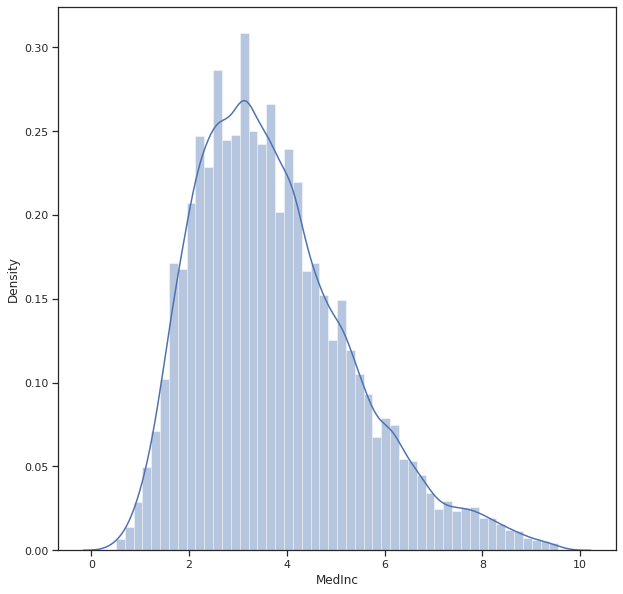

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['MedInc'])